## NYC schools and SAT scores

The Project has NYC Public School data, and tries to compare NYC Public schools with regards to demographis and test scores.

**Datasets included:**
* SAT scores by school - SAT scores for each high school in New York City
* School attendance - Attendance information for each school in New York City
* Class size - Information on class size for each school
* AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* Graduation outcomes - The percentage of students who graduated, and other outcome information
* Demographics - Demographic information for each school
* School survey - Surveys of parents, teachers, and students at each school

**Points to consider:**
* NYC has 5 boroughs(regions)
* DBN: District Borough number

# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading files into a single list
#list of csv files
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"]

In [3]:
data = {} #Dictionary with keys = csv name, value = pd.csv_read() csv files
csv_names = [] #List with CVS file names
for i in data_files:
    word = i.split(".")[0]
    csv_names.append(word)
    data[word] = pd.read_csv(i)
print("CSV files:\n",csv_names)
print("\ndata dictionary, keys:\n", data.keys())

CSV files:
 ['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results']

data dictionary, keys:
 dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])


Data dictionary contains all csv files. with name as key and dataframe as value

In [4]:
sat = data["sat_results"]
print("First 5 rows of SAT dataframe:\n")
sat.head()

First 5 rows of SAT dataframe:



,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [5]:
#for key,value in data.items():
#   print("First 5 rows of", key, ":\n", value)

* Each dataset contains a DBN column, or DBN information, so all datasets will be combined through DBN on a single dataset.
* Some Schools are repeated in multiple rows, duplicate DBN values

## Survey Data
* Both survey data files are in .txt, so they need to be read with "Windows-1252"
* Both survey files will be combined in a single dataframe. concat()

In [6]:
#Reading survey_all text file
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding="windows-1252")

In [7]:
#Reading survey_d75 text file
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding="windows-1252")

In [8]:
#Combining both survey dataframes
#all_survey on left, d75_survey on right
survey = pd.concat([all_survey, d75_survey], axis = 0)
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


* survey dataframe has a column "dbn", which should be renamed to "DBN" to match other dataframe "DBN" columns.
* There are also 2773 columns, most of which are unnecessary for the analysis.

Relevant columns:

In [9]:
#list of important columns in survey
relevant_cols = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [10]:
#New column "DBN" with "dbn" info
survey["DBN"] = survey["dbn"]

In [11]:
#New Survey Dataframe contains only relevant_cols columns
survey = survey.loc[:,relevant_cols]
#survey1 = survey.loc[:,relevant_cols]
#survey2 = survey[relevant_cols]
print("Survey shape:\n", survey.shape)

Survey shape:
 (1702, 23)


There are 1702 rows and 23 columns(relevant columns)

## CSV dataframes

In [12]:
#List with data keys / CSV dataset names
datasets = []
for i in data.keys():
    datasets.append(i)
print("These are the dataset names:\n", datasets)

These are the dataset names:
 ['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results']


In [13]:
#hs_directory DF
data["hs_directory"].head(1)
print(data["hs_directory"].shape)

(435, 64)


* hs_directory has "dbn" column (needs to change to "DBN")

In [14]:
#class_size DF
data["class_size"].head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


* class_size doesn't have "DBN" column at all

In [15]:
data["sat_results"].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


* From sat_results we can observe that DBN is obtained from mixing columns "CSD" and "SCHOOL CODE" 
* e.g. CSD (1) + SCHOOL CODE (M015)
* DBN on sat_results also has 0 padding at the beggining, so "padding" + "CSD" + "SCHOOL CODE"
* Need to fill in "CSD" column to contain two digits.

## Modifying DBN columns

**hs_directory**

In [16]:
#Creating new "DBN" colunm with "dbn" data on hs_directory
data["hs_directory"]["DBN"]=data["hs_directory"]["dbn"]

**class_size**

In [17]:
#lenght function takes in an argument and checks whether that argument has 2 characters.
#If argument has 2 characters, then it returns the argument
#Else it adds 1 zero to the front
def lenght(y):
    x = str(y) 
    s = len(x) #s checks lenght of str. Whether need padding or not
    if s == 2:
        return x
    elif s == 1:
        return x.zfill(2) #zfill adds padding if only 1 character

In [18]:
#Creating new "padded_csd" column on class_size dataset
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(lenght)

In [19]:
data["class_size"]["padded_csd"].unique()

array(['01', '04', '02', '21', '27', '05', '06', '14', '17', '20', '03',
       '32', '07', '08', '09', '10', '11', '12', '13', '15', '16', '19',
       '18', '22', '23', '24', '25', '26', '28', '29', '30', '31'],
      dtype=object)

Now, the new column has values consisting of two characters

In [20]:
#Adding up class_size columns ("padded_csv" and "SCHOOL CODE")
#New "DBN" column contains added values
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print("First few lines of DBN column:")
data["class_size"]["DBN"].head()

First few lines of DBN column:


0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

## SAT scores

As SAT scores are separated among different columns, for different score subjects, we need to join them together on a single columnn to be able to better compare it to demographics and other factors.
* They also need to be switched from "string" to a numeric data type

In [21]:
#Converting SAT columns to numeric type
print("SAT column types before converting:")
print(data["sat_results"]["SAT Math Avg. Score"].dtype)
print(data["sat_results"]["SAT Critical Reading Avg. Score"].dtype)
print(data["sat_results"]["SAT Writing Avg. Score"].dtype)
data["sat_results"]["SAT Math Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"], errors = "coerce")
data["sat_results"]["SAT Critical Reading Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"], errors = "coerce")
data["sat_results"]["SAT Writing Avg. Score"] = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors = "coerce")
print("SAT column types after converting:")
print(data["sat_results"]["SAT Math Avg. Score"].dtype)
print(data["sat_results"]["SAT Critical Reading Avg. Score"].dtype)
print(data["sat_results"]["SAT Writing Avg. Score"].dtype)

SAT column types before converting:
object
object
object
SAT column types after converting:
float64
float64
float64


In [22]:
#Adding up SAT score values/ columns into a single column "sat_results"
data["sat_results"]["sat_score"] = data["sat_results"]["SAT Math Avg. Score"] + data["sat_results"]["SAT Critical Reading Avg. Score"] + data["sat_results"]["SAT Writing Avg. Score"]
print("New SAT combined column results:")
data["sat_results"]["sat_score"].head()

New SAT combined column results:


0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

## School coordinates

The coordinates are located in the hs_directory dataset. They are located at the end of the "Location 1" column
* We need to create a function that extracts latitude and longitude
* New values will be added in new "lat" and "lon" columns

In [23]:
data["hs_directory"]["Location 1"].head(3)

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
Name: Location 1, dtype: object

**Extracting Latitude**

In [24]:
import re #regular expression
#Extract function takes in a string and extracts items in parenthesis
#Takes in hs_directory's "Location 1" column and extracts latitude
def extract_latitude(string):
    coordinate = re.findall("\(.+\)", string)
    latitude = coordinate[0].split(",")[0].replace("(","")
    return latitude

In [25]:
#Applying function to Location column
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(extract_latitude)
print("Latitudes in new 'lat' column:")
data["hs_directory"]["lat"].head()

Latitudes in new 'lat' column:


0     40.67029890700047
1      40.8276026690005
2    40.842414068000494
3     40.71067947100045
4    40.718810094000446
Name: lat, dtype: object

**Extractinng Longitude**

In [26]:
#Function that extracts longitude from "Location 1" column
def extract_longitude(string):
    coordinate = re.findall("\(.+\)", string)
    longitude = coordinate[0].split(",")[1].replace(")","")
    return longitude

In [27]:
#Applying function to Location column
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(extract_longitude)
print("Longitudes in new 'lon' column:")
data["hs_directory"]["lon"].head()

Longitudes in new 'lon' column:


0     -73.96164787599963
1     -73.90447525699966
2     -73.91616158599965
3     -74.00080702099967
4     -73.80650045499965
Name: lon, dtype: object

# Part 2

# Modifying to unique DBN columns

Multiple datasets contain DBN column rows with similar values, and so these similar values will cause problem when adding them (as index) with other DBN values from the other datasets

* Need to modify "class_size", "graduation", "demographics" datasets, so that their DBN columns have unique values

In [28]:
#Taking out space in column name
data["class_size"].columns =data["class_size"].columns.str.strip()

In [29]:
#Showing class_size problematic rows with similar DBNs
data["class_size"][["DBN", "SCHOOL NAME", "PROGRAM TYPE", "AVERAGE CLASS SIZE", "GRADE"]].head(2)

,DBN,SCHOOL NAME,PROGRAM TYPE,AVERAGE CLASS SIZE,GRADE
0,01M015,P.S. 015 Roberto Clemente,GEN ED,19.0,0K
1,01M015,P.S. 015 Roberto Clemente,CTT,21.0,0K


It shows that class_size's DBN column has similar values on different rows.
* Those rows are not the same however. They represent the same school name, but different program type, average class size, grade, etc

## Modifying CLASS_SIZE
### Selecting high school - Gen ED values

Since this analysis is about High schools, only high school grades will be selected. Similarly, Gen-ED program type will be selected, as it is the most common.

In [30]:
#Unique values in GRADE column
data["class_size"]["GRADE"].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Only 09-12 GRADE values are relevant, as they represent high school grade.

In [31]:
#Unique values in PROGRAM TYPE column
data["class_size"]["PROGRAM TYPE"].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

Further, for PROGRAM TYPE values, only GEN ED values will be considered, as it represents the largest value category.

In [32]:
#Selecting relevant columns from class_size dataset
class_size = data["class_size"] #Contains class_size dataset
class_size = class_size[class_size["GRADE"] == "09-12"] #Filtering DB so that it only contains "09-12" GRADE values
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"] #Filtering DB so that it only contains "GEN ED" PROGRAM TYPE values
print(class_size.shape)
class_size.tail(2)

(6513, 18)


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
27607,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Economics,-,65.0,2.0,32.5,32.0,33.0,STARS,NaN,32,32K564
27608,32,K,K564,Bushwick Community High School,09-12,GEN ED,SOCIAL STUDIES,Participation in Government,-,53.0,2.0,26.5,25.0,28.0,STARS,NaN,32,32K564


* Preview shows that DBN still have similar values for different rows. *

In [33]:
#Observing CORE COURSE and CORE SUBJECT columns
core_course_nunique = class_size["CORE COURSE (MS CORE and 9-12 ONLY)"].nunique()
print("Number of CORE COURSE unique values:\n", core_course_nunique)
core_subject_nunique = class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)" ].nunique()
print("Number of CORE SUBJECT unique values:\n", core_subject_nunique)
core_subject_unique = class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)" ].unique()
print("CORE SUBJECT 4 unique values:\n", core_subject_unique)

Number of CORE COURSE unique values:
 22
Number of CORE SUBJECT unique values:
 4
CORE SUBJECT 4 unique values:
 ['ENGLISH' 'MATH' 'SCIENCE' 'SOCIAL STUDIES']


* The remaining similarity in DBN rows is due to
**"CORE COURSE (MS CORE and 9-12 ONLY)"** and **"CORE SUBJECT (MS CORE and 9-12 ONLY)"** column values.

### Grouping by DBN

The reason for repeating DBN values is because there are columns with **COURSES** and **SUBJECTS** being repeated, because each course and subject account as an individual data entry, but the school and DBN are being repeated as it is added. 

Those values are useful, but they account for the same DBN, so the remaining values *(after having filtered for only High School and General Education)*, will be averaged and indexed at DBN, which will result in only one DBN per row.

In [34]:
#Grouping class_size by DBN, and averaging other values
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace = True) #resets back to numerical index
print(class_size.shape)
class_size.head(3)

(583, 8)


,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


In [35]:
#Returning "class_size" variable value back to "data" dictionary
data["class_size"] = class_size
data["class_size"].head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


* data dictionary has now been updated with class_size value

## Modifying DEMOGRAPHICS

In [36]:
#demographics dataset
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


* Similar DBN values, separated by schoolyear different values
* Only 2011 to 2012 data will be used "20112012"

In [37]:
#Filtering demographics DB by schoolyear 20112012 
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].shape)
data["demographics"].head(3)

(1509, 38)


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


Demographics dataset now includes unique values for DBN, as schoolyear has been filtered to 2011-2012

##  Modifying GRADUATION

In [38]:
#graduation dataset
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,...,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,...,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,...,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1


* Repeating DBN values are because of different Cohort and Demographics column values.

In [39]:
#gradiation - demograhic column unique values
data["graduation"]["Demographic"].unique()

array(['Total Cohort', 'Asian', 'Male', 'Black',
       'English Language Learners', 'Hispanic', 'White',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Female'], dtype=object)

* Only Total cohort values in demographic column will be used, as it acounts for the total demographic.

In [40]:
#graduation - Cohort column unique values
data["graduation"]["Cohort"].unique()

array(['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'],
      dtype=object)

* Only 2006 values in Cohort column will be used, as it represents the most recent data.

In [41]:
#Filtering by 2006 values in Cohort column
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
#Filtering by "Total Cohort" values inn Demographic column
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print(data["graduation"].shape)
data["graduation"].head(3)

(405, 23)


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6


## AP SCORES "ap_2010"

Almost all datasets are ready to be merged together.
* First need to convert Advanced Placement(AP) test scores from strings to numeric values. 
* AP scores range from 1 to 5, being 3 a passing score.
* AP scores are more popular among challenging, private funded schools.

In [42]:
#Need to fix columnn names first
data["ap_2010"].columns = data["ap_2010"].columns.str.strip()

In [43]:
#Columns that need to be converted to numeric
columns = ["AP Test Takers", "Total Exams Taken", "Number of Exams with scores 3 4 or 5"]

In [44]:
#Applying to_numeric to each column series
for col in columns:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    print(col, "type is: ", data["ap_2010"][col].dtypes)
print(data["ap_2010"].shape)

AP Test Takers type is:  float64
Total Exams Taken type is:  float64
Number of Exams with scores 3 4 or 5 type is:  float64
(258, 5)


# Merge to sat_result

* Datasets have values for different years
* Merging will be done 2 datasets at a time

### LEFT MERGE 
**sat_result on ap_2010 and graduation**
* We will do a **LEFT** merge on **sat_results** as we want to keep those DBN values, and because the other datasets have many missing DBN values.

In [45]:
#Assigning sat_results df to combined variable
combined = data["sat_results"]
print(combined.shape)

(478, 7)


**Combined = sat_results(left) & ap_2010**

In [46]:
#Merging and returning result back to combined
combined = combined.merge(data["ap_2010"], how="left", on="DBN")
print(combined.shape)

(479, 11)


**Combined & graduation**

In [47]:
#Merging combined(left) and graduation and returning result back to combined
combined = combined.merge(data["graduation"], how="left", on="DBN")
print("merged df shape is: ", combined.shape)
combined.head(2)

merged df shape is:  (479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1


### INNER Merge
**combined with class_size, demographics, survey, and hs_directory**
* These datasets will be merged used inner join, as they contain more valuable information, and also have fewer missing DBNs
* Need to merge them in order:
    1. class_size
    2. demographics
    3. survey
    4. hs_directory

**Inner merging each dataset back to combined, IN ORDER**

In [48]:
#class_size
combined = combined.merge(data["class_size"], how="inner", on="DBN")
print("Combined with class_size shape:\n", combined.shape)
#demographics
combined = combined.merge(data["demographics"], how="inner", on="DBN")
print("Combined with demographics shape:\n", combined.shape)
#survey
combined = combined.merge(survey, how="inner", on="DBN")
print("Combined with survey shape:\n",combined.shape)
#hs_directory
combined = combined.merge(data["hs_directory"], how="inner", on="DBN")
print("Combined with hs_directory shape:\n",combined.shape)

Combined with class_size shape:
 (435, 40)
Combined with demographics shape:
 (435, 77)
Combined with survey shape:
 (435, 99)
Combined with hs_directory shape:
 (363, 165)


In [49]:
print("New combined shape is: ", combined.shape)
combined.head(3)

New combined shape is:  (363, 165)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.71376394700047,-73.98526003999967
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.7123318510005,-73.98479662499966
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729782687000466,-73.98304144099967


### Null values
After having merged all datasets, the final dataset contains numerous missing values, because they were merged with left merge based on "sat_result", and the other datasets did not have as many DBN's as sat_result did.
* The missing values need to be modified to represent the mean of the respective column.
* Remaining null values will contain 0

In [50]:
#Mean of each column
mean = combined.mean()
#Filling missing values back to combined
combined = combined.fillna(mean)
#Filling REMAINING missing values with 0
combined = combined.fillna(0)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.71376394700047,-73.98526003999967
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.7123318510005,-73.98479662499966
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729782687000466,-73.98304144099967


### Assigning School District
Now that the final combined dataset contains all the merged datasets, and there is no null values, combined can be analyzed.
We first need to assign a School District to separate rows based on it.
The school district is obtained through the DBN, as the DBN's first two characters contain that information.

In [51]:
#Function that returns first two characters of a string
def first_two(string):
    return string[0:2]

In [52]:
#Applying first_two function to DBN column in combined.
#New column "school_dist" has the resulting info
combined["school_dist"] = combined["DBN"].apply(first_two)
combined["school_dist"].head(3)

0    01
1    01
2    01
Name: school_dist, dtype: object

# Part 3

## Finding Correlations

In [53]:
#Combined correlations
correlations = combined.corr()
#Only "sat_score" correlations
correlations = correlations["sat_score"]
correlations.head()

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
Name: sat_score, dtype: float64

* **"SAT Critical Reading Avg. Score"**, **"SAT Math Avg. Score"**, and **"SAT Writing Avg. Score"** have strong correlation with "sat_score".
* **"total_enrollment** appears to have a positive correlation to "sat_score".

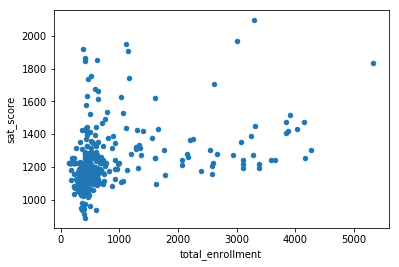

In [54]:
#Scatter plot that visualized correlation between total enrollment and sat score
combined.plot.scatter(x="total_enrollment", y="sat_score")

There doesn't seem to be a strong correlation. There are some outlier data points.
* There is a cluster on the bottom left that contains most of the data, and which might have caused the correlation to be high.
* total_enrollment below 1000, and sat_score below 1400

**Cluster below 1000 on both sides**

In [55]:
#Filters rows with total enrollment below 1000
enroll_cluster_1000 = combined["total_enrollment"] < 1000
#Filters rows with sat_score below 1000
sat_cluster_1000 = combined["sat_score"] < 1000
# Applying filters to new variable
low_enrollment = combined[enroll_cluster_1000]
low_enrollment = low_enrollment[sat_cluster_1000]

In [56]:
#Displaying School names from filtered variable
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

After observing these schools, we realize that these schools with **low total enrollment** and **low sat scores** are school with **High percentage of English Language Learners**
* English learners correlate positively with sat scores (ell_percent), and not necesarily total_enrollment.

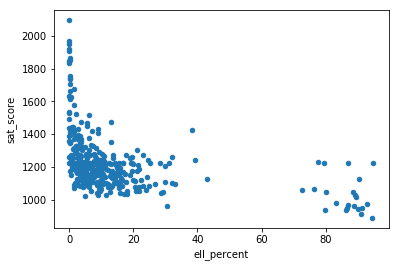

In [57]:
combined.plot.scatter(x="ell_percent", y="sat_score")

* There is still not much relationship.
* Will need to observe correlation by school district

## Visualizing Geographic Data

* Will use Basemap with following code:

```python
    from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
```
* First need to convert latitude and longitude values (lat, lon) columns to x, y coordinates